# Collecting the Data

In [28]:
# DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import tensorflow as tf
import tensorflow.keras as keras
import os

np.random.seed(42)

In [33]:
print(os.getcwd())

filepath = os.getcwd() + '/cell_images/'

print(filepath)

/Users/sampoad/Documents/Ironhack/data-labs/final-project
/Users/sampoad/Documents/Ironhack/data-labs/final-project/cell_images/


# Read in an actual image from the dataset

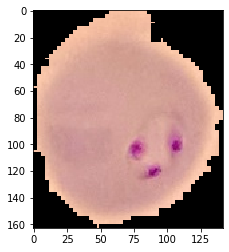

In [60]:
cell_img_array_pos_mal = image.imread('./cell_images/parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

plt.imshow(cell_img_array_pos_mal)

In [61]:
cell_img_array = asarray(image.imread('./cell_images/parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'))

In [62]:
cell_img_array.dtype

dtype('float32')

In [63]:
cell_img_array.shape

(163, 142, 3)

In [64]:
cell_img_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

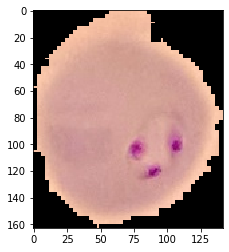

In [30]:
plt.imshow(cell_img_array)

# Iterate through my directory of images (one for positive malaria, one for negative)


In [66]:
# quick check to confirm the shape of the images
img_sizes = []

for filename in os.listdir(filepath + 'Parasitized'):
    if filename.endswith('.png'):
        img_size = asarray(image.imread(filepath + 'Parasitized/' + filename).shape)
        img_sizes.append(img_size)
    
print(img_sizes[:5]) # so not every image is the same size

[array([115, 112,   3]), array([121, 118,   3]), array([169, 148,   3]), array([106, 136,   3]), array([ 91, 103,   3])]


In [83]:
pos_mal_img_arrays = []

for filename in os.listdir(filepath + 'Parasitized'):
    if filename.endswith('.png'):
        img_array = asarray(image.imread(filepath + 'Parasitized/' + filename))
    
    pos_mal_img_arrays.append(np.ravel(img_array))

print(pos_mal_img_arrays[:5])
# but do the above as a dataframe instead.
# at that point, i'd have a list of arrays.
# 

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]


### Trying to get all this into a dataframe.

In [84]:
df = pd.DataFrame( # create an empty dataframe
    columns = ['image_array', 'Malaria',]
)


# for i in range( 1,numOfRows):
#     df2.loc[i]  = np.random.randint(100, size=(1,5))[0]

In [85]:
df.head()

,image_array,Malaria


In [86]:
# get number of images in parasitized directory

# for i in range (that number): # hmm i can't do two for-loops easily here. switch back to append? slower performance
#     df.loc[i] = np.ravel(asarray(read in that image))

In [94]:

for i, filename in enumerate(os.listdir(filepath + 'Parasitized')):
    if filename.endswith('.png'):
        df.append( dict(np.ravel(asarray(image.imread(filepath + 'Parasitized/' + filename)))))
#         df.loc[i] = np.ravel(asarray(image.imread(filepath + 'Parasitized/' + filename)))
#         print(i, filename)

df.head()

SyntaxError: invalid syntax (<ipython-input-94-74d7695acd0f>, line 3)

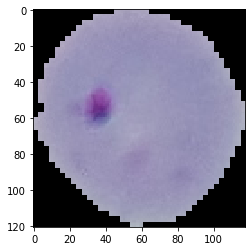

In [46]:
plt.imshow(pos_mal_img_arrays[1])

### After reading all the information in as an array, normalize and scale it, then apply it to a dataframe. 
on that dataframe, add the Class label that corresponds. 

and then do the same for the non-parasitized images